# Data Mining Lab 1: Data Visualization and Data Preprocessing

   MSDS 7331 - Section 403<br>
   Andrew Walch | Rob Rivens | Sabitri KC

### Purpose of Dataset 

We chose to analyze a data set with historic daily market price for all cryptocurrencies from <a href="https://www.kaggle.com/jessevent/all-crypto-currencies/data">Kaggle</a>.Crypto Currency trading data for 1,382 "Cryptos" with 13 attributes.The data was collected between 2013 to January 2018 for all historic open, high, low, close values for all cryptocurrencies.
We were interested in the data set due to the popularity of Crypto Currencies such as Bitcoin, Ripple, Bitcoin Cash and others.  Given the recent volatility in the market, we thought it would be interesting to analyze Open, High and Closing Prices, while trying to determine if there is a correlation between Price and relative rank of the currencies.
We will run a Principal Component Analysis to determine if we can reduce our variables.  We will measure the effectiveness of our algorithm by determining the percent of the variation explained by our Principal Components.  We will use a "train set" of data, using the Buy Flag as our target.

### Data Understanding - Describe the meaning and type of data for each attribute in the data file

Originally,There were 13 attributes in the datset described are as follows:
- slug = name of currency; 
- symbol = trading symbol of currency;
- name = common name of currency;
- date = date of trading data;
- ranknow = rank of currency;
- open = The amount in US Dollars that the day started at;
- high = The highest amount it got to in US dollars that day; 
- low =The lowest  amount it got to in US dollars that day;
- close = The amount in US dollars that the day finished at;
- volume = The value in US dollars of how many were exchanged that day;
-  market =The total amount of market capital (combined worth) in US dollars ;
- close_ratio = closing price / high price for the day;
- spread = difference between open and closing price for the day;<br>
we added new attribute called Buy_Flag for our analysis,
- Buy_Flag = variable added to determine if currency should be purchase or not.

### Verify Data Quality

The data types of attributes are as follows: (1) Text fields: slug, symbol, name; (2) Date field: date;  (3) Integer Fields: ranknow, Buy_Flag; (4) US Dollar Numeric fields: open, high, low, close, market, spread; (5) Numeric field: volume; (6) Percentage Field(Float): close_ratio

From the summary of variables calculation,there were only  644847 entries out of 659373 on our close_ratio columns so 14,526 entries were missing or NA's.we recalculate the close ratio value by [close_ratio = closing price / high price for the day]and changed the missing or NA's due to errors in calculation in data set.
we added a new boolean column that will identify a duplicated Symbol (False=Not a duplicate; True=Duplicate).Inspect dataset to determine if duplicates make sense.Duplicates are okay since the data is continuous (currency prices by day, over the span of calendar years).
Due to the large amount of data, we will create a top 10 rank and only keep the observations falling within this range.



### Exploratory Analysis 

In [130]:
#import libraries
import pandas as pd
import numpy as np
import datetime as dt

In [131]:
df = pd.read_csv("Data/allcrypto.csv",low_memory=False,parse_dates=True)

Check Data Frame to ensure data read-in properly.

In [132]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,4/28/2013,1,135.300000,135.980000,132.100000,134.210000,0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,4/29/2013,1,134.440000,147.490000,134.000000,144.540000,0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,4/30/2013,1,144.000000,146.930000,134.050000,139.000000,0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,5/1/2013,1,139.000000,139.890000,107.720000,116.990000,0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,5/2/2013,1,116.380000,125.600000,92.280000,105.210000,0,1.292190e+09,0.3881,33.32
5,bitcoin,BTC,Bitcoin,5/3/2013,1,106.250000,108.130000,79.100000,97.750000,0,1.180070e+09,0.6424,29.03
6,bitcoin,BTC,Bitcoin,5/4/2013,1,98.100000,115.000000,92.500000,112.500000,0,1.089890e+09,0.8889,22.50
7,bitcoin,BTC,Bitcoin,5/5/2013,1,112.900000,118.800000,107.140000,115.910000,0,1.254760e+09,0.7521,11.66
8,bitcoin,BTC,Bitcoin,5/6/2013,1,115.980000,124.660000,106.640000,112.300000,0,1.289470e+09,0.3141,18.02
9,bitcoin,BTC,Bitcoin,5/7/2013,1,112.250000,113.440000,97.700000,111.500000,0,1.248470e+09,0.8767,15.74


Check first 5 observations

In [133]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,4/28/2013,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,4/29/2013,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,4/30/2013,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,5/1/2013,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,5/2/2013,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.3881,33.32


##### Review summary of variables

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659373 entries, 0 to 659372
Data columns (total 13 columns):
slug           659373 non-null object
symbol         659373 non-null object
name           659373 non-null object
date           659373 non-null object
ranknow        659373 non-null int64
open           659373 non-null float64
high           659373 non-null float64
low            659373 non-null float64
close          659373 non-null float64
volume         659373 non-null int64
market         659373 non-null float64
close_ratio    644847 non-null object
spread         659373 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 65.4+ MB


 Change Close Ratio due to errors in calculation in data set 

In [135]:
df.close_ratio=df.close/df.high

 Check Close Ratio variable

In [136]:
df.close_ratio.min(),df.close_ratio.max(), df.close_ratio.median()

(0.0, 1.0, 0.9301559162236391)

 Check min, max and median Closing Currency Price 

In [137]:
df.close.min(), df.close.max(), df.close.median(), df.close.std()

(0.0, 2300740.0, 0.0067, 9297.60086985845)

Check other statistics

In [138]:
df.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,659373.000000,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,659373.000000,6.593730e+05
mean,664.808072,1.954633e+02,2.390818e+02,1.582942e+02,1.952336e+02,4.024155e+06,9.494453e+07,0.880615,8.078717e+01
std,376.857132,9.339245e+03,1.215379e+04,7.104065e+03,9.297601e+03,1.419269e+08,2.653153e+09,0.144059,6.194455e+03
min,1.000000,1.000000e-10,1.300000e-10,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,362.000000,4.130000e-04,4.830000e-04,3.550000e-04,4.140000e-04,2.000000e+01,6.706000e+03,0.835714,0.000000e+00
50%,666.000000,6.680000e-03,7.732000e-03,5.828000e-03,6.700000e-03,3.400000e+02,7.521600e+04,0.930156,0.000000e+00
75%,961.000000,9.682200e-02,1.119570e-01,8.445300e-02,9.728600e-02,7.618000e+03,9.043740e+05,0.981651,2.000000e-02
max,1408.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.260000e+11,1.000000,1.770563e+06


### Simple Statistics

The table above shows the simple statistics for the numeric values in the table.


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659373 entries, 0 to 659372
Data columns (total 13 columns):
slug           659373 non-null object
symbol         659373 non-null object
name           659373 non-null object
date           659373 non-null object
ranknow        659373 non-null int64
open           659373 non-null float64
high           659373 non-null float64
low            659373 non-null float64
close          659373 non-null float64
volume         659373 non-null int64
market         659373 non-null float64
close_ratio    659373 non-null float64
spread         659373 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 65.4+ MB


The count show that all the missing data or NA values in close_ratio have been replaced by actual values.

Add a new boolean column that will identify a duplicated Symbol (False=Not a duplicate; True=Duplicate)

In [140]:
df['is_duplicated'] = df.duplicated(['symbol'])

In [141]:
df['is_duplicated'].sum()

658004

Inspect dataset to determine if duplicates make sense

In [142]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,is_duplicated
0,bitcoin,BTC,Bitcoin,4/28/2013,1,135.300000,135.980000,132.100000,134.210000,0,1.500520e+09,0.986983,3.88,False
1,bitcoin,BTC,Bitcoin,4/29/2013,1,134.440000,147.490000,134.000000,144.540000,0,1.491160e+09,0.979999,13.49,True
2,bitcoin,BTC,Bitcoin,4/30/2013,1,144.000000,146.930000,134.050000,139.000000,0,1.597780e+09,0.946029,12.88,True
3,bitcoin,BTC,Bitcoin,5/1/2013,1,139.000000,139.890000,107.720000,116.990000,0,1.542820e+09,0.836300,32.17,True
4,bitcoin,BTC,Bitcoin,5/2/2013,1,116.380000,125.600000,92.280000,105.210000,0,1.292190e+09,0.837659,33.32,True
5,bitcoin,BTC,Bitcoin,5/3/2013,1,106.250000,108.130000,79.100000,97.750000,0,1.180070e+09,0.904004,29.03,True
6,bitcoin,BTC,Bitcoin,5/4/2013,1,98.100000,115.000000,92.500000,112.500000,0,1.089890e+09,0.978261,22.50,True
7,bitcoin,BTC,Bitcoin,5/5/2013,1,112.900000,118.800000,107.140000,115.910000,0,1.254760e+09,0.975673,11.66,True
8,bitcoin,BTC,Bitcoin,5/6/2013,1,115.980000,124.660000,106.640000,112.300000,0,1.289470e+09,0.900850,18.02,True
9,bitcoin,BTC,Bitcoin,5/7/2013,1,112.250000,113.440000,97.700000,111.500000,0,1.248470e+09,0.982898,15.74,True


Duplicates are okay since the data is continuous (currency prices by day, over the span of calendar years).

 Due to the large amount of data, we will create a top 10 rank and only keep the observations falling within this range.

In [143]:
top10_rank = [1,2,3,4,5,6,7,8,9,10]

In [144]:
df = df[df['ranknow'].isin(top10_rank)]

We'll look at the data frame to confirm our ranking was successful 

In [145]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,is_duplicated
0,bitcoin,BTC,Bitcoin,4/28/2013,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.986983,3.88,False
1,bitcoin,BTC,Bitcoin,4/29/2013,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.979999,13.49,True
2,bitcoin,BTC,Bitcoin,4/30/2013,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.946029,12.88,True
3,bitcoin,BTC,Bitcoin,5/1/2013,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.836300,32.17,True
4,bitcoin,BTC,Bitcoin,5/2/2013,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.837659,33.32,True
5,bitcoin,BTC,Bitcoin,5/3/2013,1,106.25,108.13,79.10,97.75,0,1.180070e+09,0.904004,29.03,True
6,bitcoin,BTC,Bitcoin,5/4/2013,1,98.10,115.00,92.50,112.50,0,1.089890e+09,0.978261,22.50,True
7,bitcoin,BTC,Bitcoin,5/5/2013,1,112.90,118.80,107.14,115.91,0,1.254760e+09,0.975673,11.66,True
8,bitcoin,BTC,Bitcoin,5/6/2013,1,115.98,124.66,106.64,112.30,0,1.289470e+09,0.900850,18.02,True
9,bitcoin,BTC,Bitcoin,5/7/2013,1,112.25,113.44,97.70,111.50,0,1.248470e+09,0.982898,15.74,True


### Data Visualization and Attribute Relationships

In [146]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import seaborn as sns

Since Bitcoin is in no 1 in the rank,lets see the trend from 2013

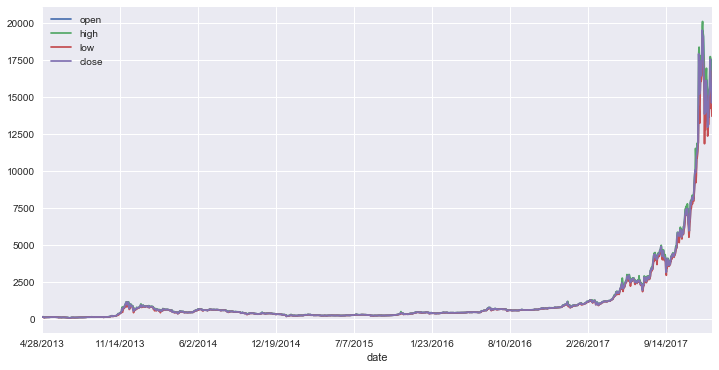

In [147]:
Bitcoin_price = df[df['name']=='Bitcoin']
Bitcoin_price.set_index(['date'],inplace=True)
Bitcoin_price[['open','high','low','close']].plot(figsize=(12,6))
plt.show()

we can see that the price of bitcoin increased rapidly or trend really started from 2017,so lets check closer 

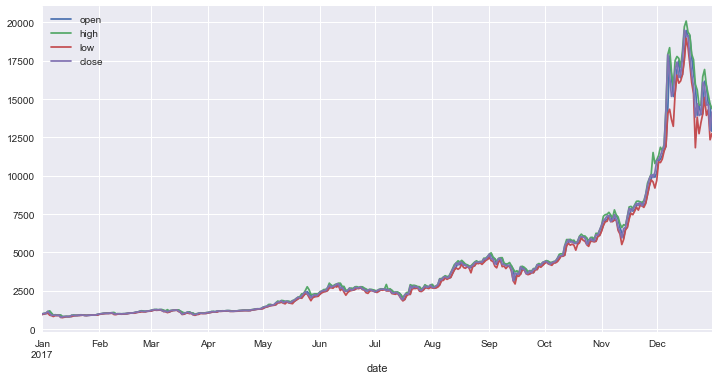

In [148]:
start_17 = pd.to_datetime('2017-01-01')
end_17 = pd.to_datetime('2018-01-01')
Bitcoin_price17 = df[df['name']=='Bitcoin']
Bitcoin_price17 = Bitcoin_price17[pd.to_datetime(Bitcoin_price17['date']) >= start_17] # getting greater than 2017
Bitcoin_price17= Bitcoin_price17[pd.to_datetime(Bitcoin_price17['date']) < end_17] # getting less than 2018
Bitcoin_price17.set_index(pd.to_datetime(Bitcoin_price17['date']),inplace=True)
Bitcoin_price17[['open','high','low','close']].plot(figsize=(12,6))
plt.show()

In [149]:
# Find the top 10 crypto curriencies rank
df[df['ranknow'] <= 10].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2         [Ethereum]
3           [Ripple]
4     [Bitcoin Cash]
5          [Cardano]
6         [Litecoin]
7              [NEM]
8             [IOTA]
9          [Stellar]
10            [Dash]
Name: name, dtype: object

In [150]:
# Let's find out more about the top 10 coins...
Bitcoin = df[df['name']=='Bitcoin']
Ethereum = df[df['name']=='Ethereum']
Ripple = df[df['name']=='Ripple']
Bitcoin_cash = df[df['name']=='Bitcoin Cash']
Cardano = df[df['name']=='Cardano']
Litecoin = df[df['name']=='Litecoin']
NEM = df[df['name']=='NEM']
IOTA = df[df['name']=='IOTA']
Stellar = df[df['name']=='Stellar']
Dash = df[df['name']=='Dash']
#Setting index date all dataframe
Bitcoin.set_index(pd.to_datetime(Bitcoin['date']),inplace=True)
Ethereum.set_index(pd.to_datetime(Ethereum['date']),inplace=True)
Ripple.set_index(pd.to_datetime(Ripple['date']),inplace=True)
Bitcoin_cash.set_index(pd.to_datetime(Bitcoin_cash['date']),inplace=True)
Cardano.set_index(pd.to_datetime(Cardano['date']),inplace=True)
Litecoin.set_index(pd.to_datetime(Litecoin['date']),inplace=True)
NEM.set_index(pd.to_datetime(NEM['date']),inplace=True)
IOTA.set_index(pd.to_datetime(IOTA['date']),inplace=True)
Stellar.set_index(pd.to_datetime(Stellar['date']),inplace=True)
Dash.set_index(pd.to_datetime(Dash['date']),inplace=True)

 Let's analyze the trend for closing price from 2013

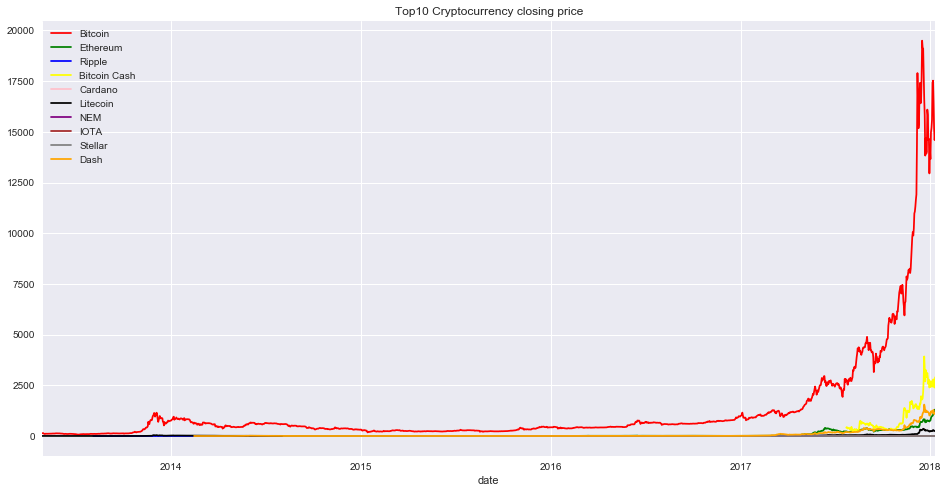

In [151]:

plt.figure(figsize=(16,8))
(Bitcoin['close']).plot(color='red', label='Bitcoin')
(Ethereum['close']).plot(color='green', label='Ethereum')
(Ripple['close']).plot(color='blue', label='Ripple')
(Bitcoin_cash['close']).plot(color='yellow', label='Bitcoin Cash')
(Cardano['close']).plot(color='pink', label='Cardano')
(Litecoin['close']).plot(color='black', label='Litecoin')
(NEM['close']).plot(color='purple', label='NEM')
(IOTA['close']).plot(color='brown', label='IOTA')
(Stellar['close']).plot(color='grey', label='Stellar')
(Dash['close']).plot(color='orange', label='Dash')
plt.legend()
plt.title('Top10 Cryptocurrency closing price')
plt.show()

Let's see the trending volume of market capital from 2013 to 2018

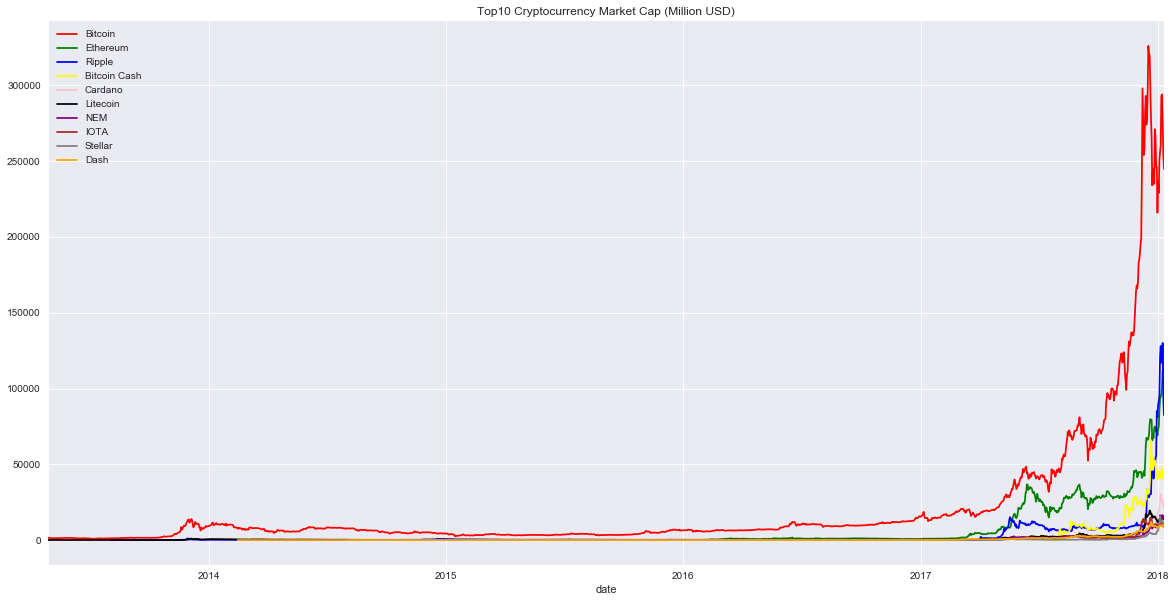

In [152]:

plt.figure(figsize=(20,10))
(Bitcoin['market']/1000000).plot(color='red', label='Bitcoin')
(Ethereum['market']/1000000).plot(color='green', label='Ethereum')
(Ripple['market']/1000000).plot(color='blue', label='Ripple')
(Bitcoin_cash['market']/1000000).plot(color='yellow', label='Bitcoin Cash')
(Cardano['market']/1000000).plot(color='pink', label='Cardano')
(Litecoin['market']/1000000).plot(color='black', label='Litecoin')
(NEM['market']/1000000).plot(color='purple', label='NEM')
(IOTA['market']/1000000).plot(color='brown', label='IOTA')
(Stellar['market']/1000000).plot(color='grey', label='Stellar')
(Dash['market']/1000000).plot(color='orange', label='Dash')
plt.legend()
plt.title('Top10 Cryptocurrency Market Cap (Million USD)')
#Bitcoin.set_index(['date'],inplace=True)
plt.show()

### PCA and Dimensionality Reduction

In [153]:
from sklearn.preprocessing import StandardScaler

We will perform our PCA using only the currency prices, close ratio and spread, as other variables were unrelated to performance 

In [154]:
features = ['open', 'high', 'low', 'close', 'close_ratio', 'spread']

The next two lines of code separate the training set from the test set

In [155]:
x = df.loc[:, features].values

In [156]:
y = df.loc[:,['Buy_Flag']].values

KeyError: "None of [['Buy_Flag']] are in the [columns]"

The next lines of code standardize the features and run the PCA 

In [157]:
x = StandardScaler().fit_transform(x)

In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [159]:
finalDf = pd.concat([principalDf, df[['Buy_Flag']]], axis = 1)

KeyError: "['Buy_Flag'] not in index"

 We will now visualize the results of the PCA 

In [160]:
import matplotlib.pyplot as plt

NameError: name 'finalDf' is not defined

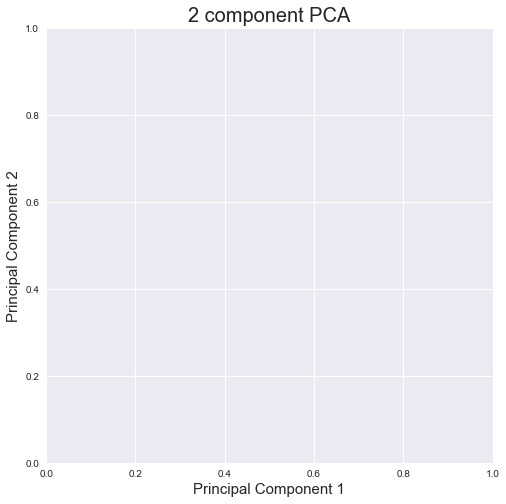

In [161]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for Buy_Flag, color in zip(targets,colors):
    indicesToKeep = finalDf['Buy_Flag'] == Buy_Flag
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

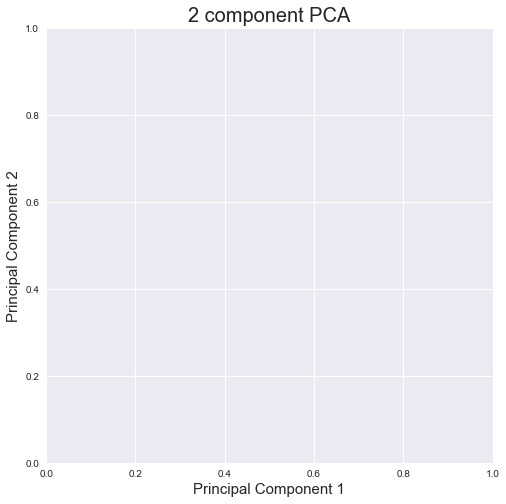

In [162]:
fig

#### Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components. The first principal component contains 79.5% of the variance and the second principal component contains 16.8% of the variance. Together, the two components contain 96.3% of the information we need to determine Buy vs Do Not Buy!!! 

In [ ]:


pca.explained_variance_ratio_

Lastly, a review of the final Principal Components Data Frame 

In [ ]:
finalDf

### Any Interesting Features:????

### Other Features That Could Be Added
we just did analysis on top 10 cryptocurrencies so there are more than 1300 more currencies that could be explored.




### Exceptional work: 

Although PCA is one of the best algorithms,we can try some other predicting machine learning algorithm  and it may performed slightly betteer
